In [2]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2
import os
import verse.utils.data_utilities as dutils

#### Load full tomography

In [20]:
directory = 'images/CIMAD/volume_tx_abdomen_s_c'

# img = "4899"
# img = "19811"
# img = "73264"
# img = "76172"

result = {}
for root, dirs, _ in os.walk(directory):
    for dir in dirs:
        for _, _, files in os.walk(os.path.join(root, dir)):
            for file in sorted(files): 
                if ".dcm" in file:# exclude non-dicoms, good for messy folders
                    ds = pydicom.dcmread(os.path.join(root, dir, file), force=True)
                    result[ds.get("PatientID", "NA")] = {
                        'sex': ds.get("PatientSex", "NA"),
                        'age': int(ds.get("PatientAge", "NA")[:-1])
                    }
                    # if ds.get("PatientSize", None): result[[ds.get("PatientID", "NA")]'size'] = ds.get("PatientSize", None)
                    # if ds.get("PatientWeight", None): result['w[ds.get("PatientID", "NA")]eight'] = ds.get("PatientWeight", None)
                    # if ds.get("PatientBodyMassIndex", None): result[ds.get("PatientID", "NA")]['BMI'] = ds.get("PatientBodyMassIndex", None)
                    break

result

{'96672': {'sex': 'F', 'age': 71},
 '76172': {'sex': 'M', 'age': 34},
 '73264': {'sex': 'M', 'age': 66},
 '134374': {'sex': 'F', 'age': 61},
 '116739': {'sex': 'M', 'age': 35},
 '94169': {'sex': 'M', 'age': 36},
 '135284': {'sex': 'F', 'age': 64},
 '97097': {'sex': 'M', 'age': 75},
 '4899': {'sex': 'F', 'age': 55},
 '19811': {'sex': 'F', 'age': 73}}

In [2]:
BASE_PATH = 'images/CIMAD/sorted/134374/20221213/torax_+_abd_total_s_c/volume_tx_abdomen_s_c'

unsortedList = []
for root, dirs, files in os.walk(BASE_PATH):
    for file in files: 
        if ".dcm" in file:# exclude non-dicoms, good for messy folders
            ds = pydicom.dcmread(os.path.join(root, file), force=True)
            unsortedList.append({'pixel_array': ds.pixel_array, 'instance': int(ds.get("InstanceNumber","0"))})
    
sortedList = sorted(unsortedList, key=lambda dmc_file : dmc_file['instance'])

body = np.array([dcm_file['pixel_array'] for dcm_file in sortedList])
body.shape

(529, 512, 512)

#### MIP (by amax's axis)

In [ ]:
plt.imshow(np.amax(body, axis=1), cmap="gray", extent=[-1,1,-1,1])

#### MIP (by transposing)

In [ ]:
transposed = np.transpose(body, axes=(2, 0, 1))
selected_slices = transposed[230:260]
mip = np.amax(selected_slices, axis=0)
image_size = (int(mip.shape[0]*1), int(mip.shape[1]*1))
mip_stretched = cv2.resize(mip, dsize=image_size)
plt.imshow(mip_stretched, cmap="gray")
plt.imsave('mip.jpeg', mip_stretched, cmap="gray")


In [7]:
BASE_PATH = 'results/4899'

ds = pydicom.dcmread(os.path.join(BASE_PATH, 'CT.1.2.840.113619.2.417.3.2831161857.684.1671447638.644.3.282.dcm'), force=True)
ds.pixel_array.shape

(512, 512)

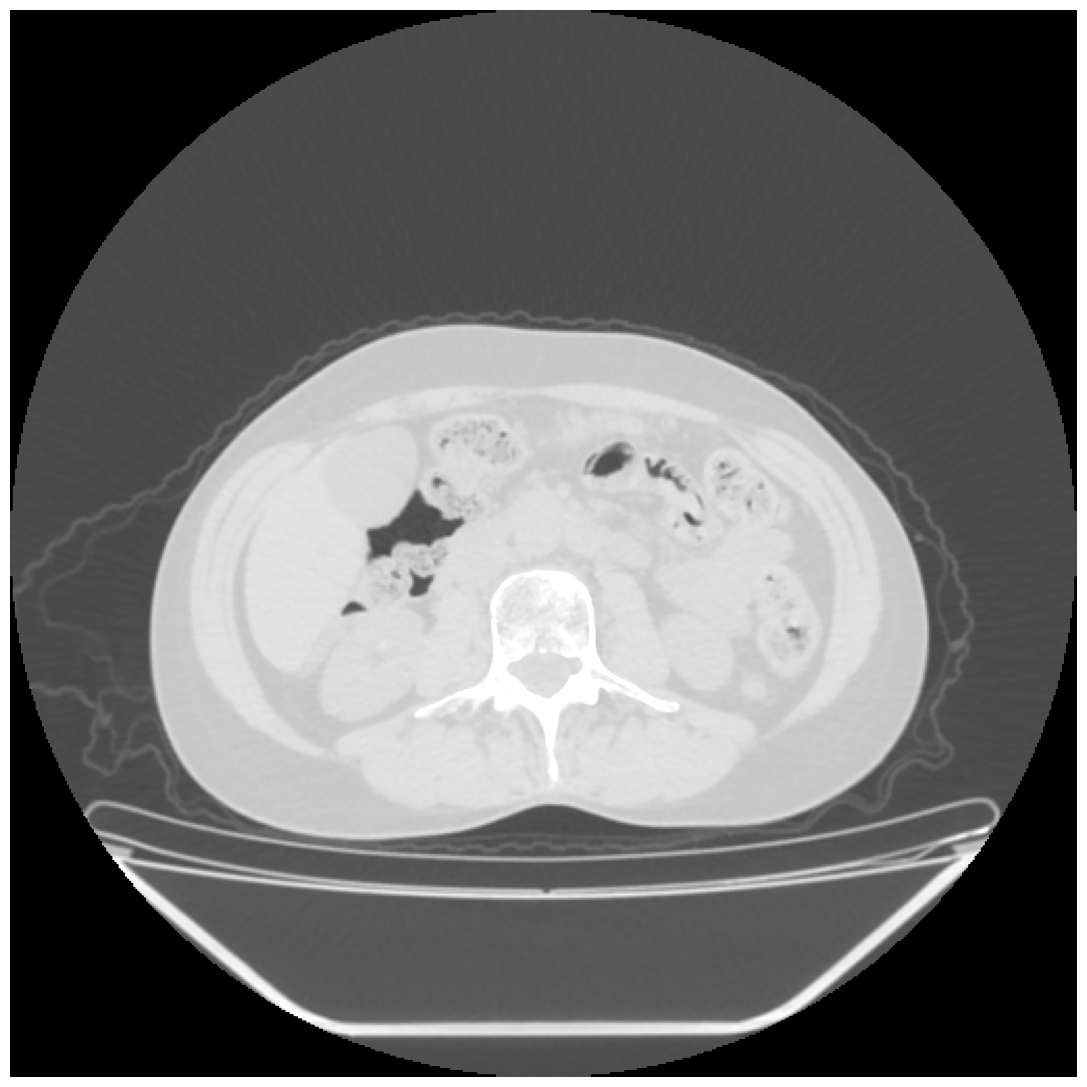

In [9]:
dpi = 96
fig_h = round(2 * ds.pixel_array.shape[0] / dpi, 2)
fig_w = round(2 * ds.pixel_array.shape[1] / dpi, 2)
fig, axs = plt.subplots(1, 1, figsize=(fig_w, fig_h))

axs.axis('off')
axs.set_position([1, 0, 1, 1])
axs.imshow(ds.pixel_array, cmap=plt.cm.gray, norm=dutils.wdw_sbone)